In [62]:
import numpy as np
import io
import sys
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import math
from scipy import stats

%matplotlib inline

In [63]:
n_path = 'Examples/australia/xrun_6/realtime_data/'
o_path = 'Examples/australia/xrun_6/realtime_data/'

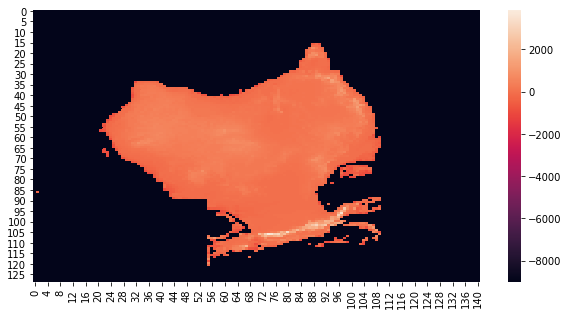

In [64]:
elev = np.loadtxt('Examples/australia/data/final_elev_filtered_ocean.txt')

plt.figure(figsize=(10,5))
sns.heatmap(elev)

old_elev = pickle.load(open("%s0/pred_elev_vec.pkl"%(o_path), "rb" ) )

new_elev = pickle.load(open("%s1/pred_elev_vec.pkl"%(n_path), "rb" ) )

In [65]:
# # print(elev)
# plt.figure(figsize=(10,5))
# sns.heatmap(elev)

# plt.figure(figsize=(10,5))
# sns.heatmap(old_elev[0.0])

# plt.figure(figsize=(10,5))
# sns.heatmap(new_elev[0.0])

# residual = old_elev[0.0] - new_elev[0.0]

# plt.figure(figsize=(10,5))
# sns.heatmap(residual)

In [18]:
# elev[(elev < 0) | (elev > 400)] = 0
# flat_elev = elev.flatten()

# plt.figure(figsize=(10,5))
# sns.distplot(flat_elev, bins = 30,kde = False)

# old_elev = old_elev[0.0]

# old_elev[(old_elev < 0) | (old_elev > 400)] = 0

# old_elev_flat = old_elev
# old_elev_flat = old_elev_flat.flatten()

# plt.figure(figsize=(10,5))
# sns.distplot(old_elev_flat,bins = 30, kde = False)

# new_elev = new_elev[0.0]

# new_elev[(new_elev < 0) | (new_elev > 400)] = 0

# new_elev_flat = new_elev
# new_elev_flat = new_elev_flat.flatten()

# plt.figure(figsize=(10,5))
# sns.distplot(new_elev_flat,bins = 30, kde = False)

In [19]:
true_elev = elev
old_elev = old_elev[0.0]
new_elev = new_elev[0.0]


In [20]:
print(true_elev.shape, old_elev.shape, new_elev.shape)

((129, 141), (129, 141), (129, 141))


(array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'condition')


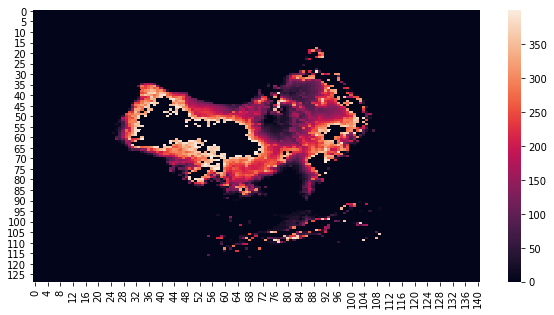

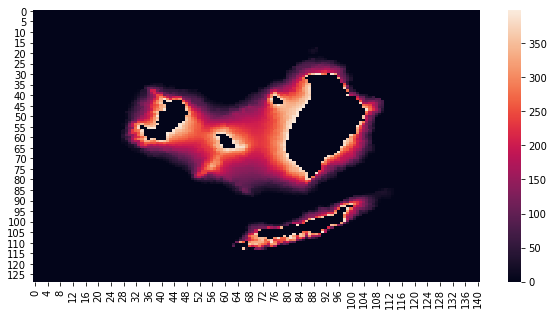

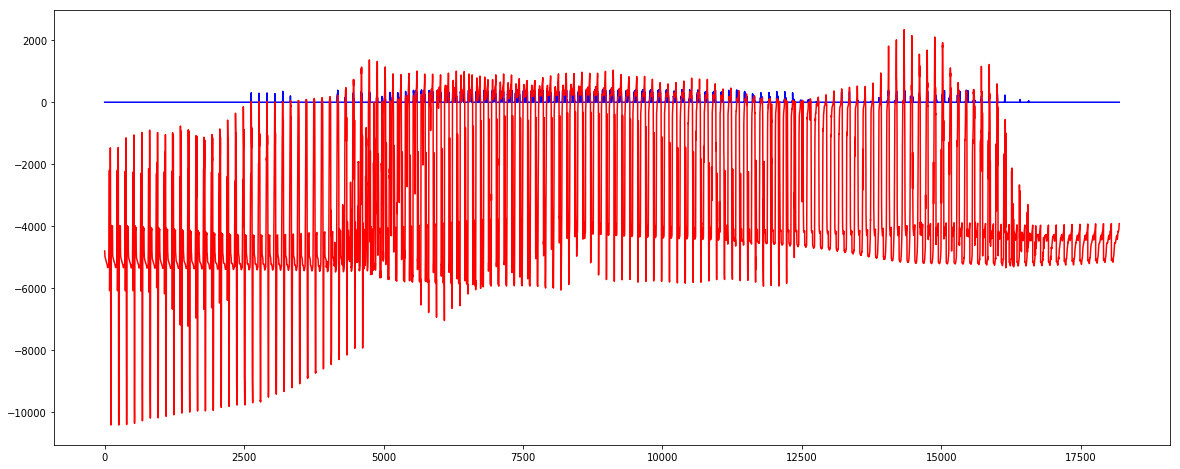

In [60]:
condition = (true_elev>0) & (true_elev<400)
print(condition, 'condition')

a = np.where((true_elev>0) & (true_elev<400), true_elev, 0)
x = a.flatten() 


a_ = np.where((new_elev>0) & (new_elev<400), new_elev, 0)
x_ = a_.flatten() 

plt.figure(figsize=(10,5))
sns.heatmap(a) 


plt.figure(figsize=(10,5))
sns.heatmap(a_) 

 
pred_flat = x
elev_flat = new_elev.flatten()
diff = np.zeros(elev_flat.shape[0])



rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pred_flat, color = 'b')  
ax1.plot(elev_flat, color = 'r')  

#ax1.plot(x, color = 'g')  

(array([4795.81758233, 4797.04796707, 4885.02124399, ..., 3951.12246116,
       3914.26796548, 3913.75708485]), 18189)


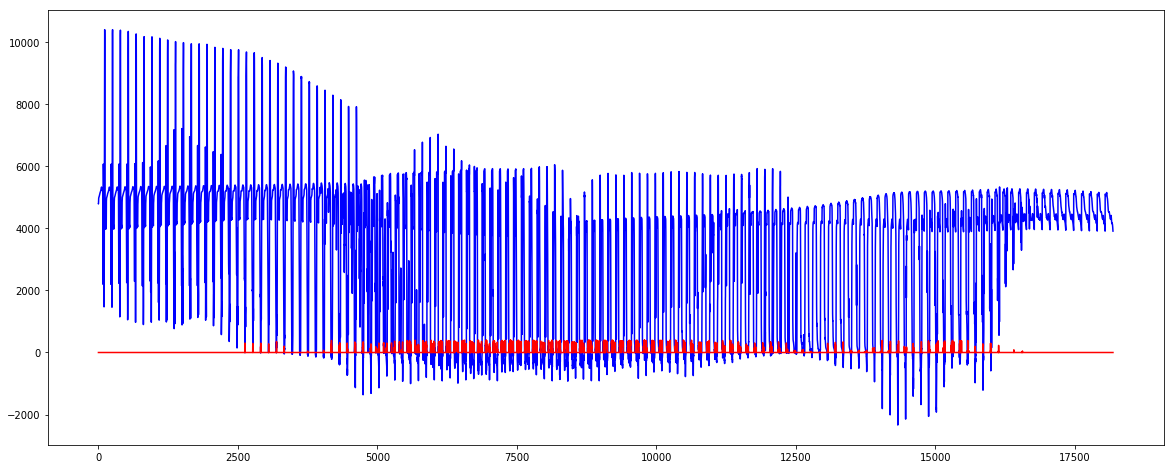

(14995300.812614791, 3872.3766362035076, ' elev')


In [61]:
plt.show()
 
count = 0
for i in range(pred_flat.shape[0]):
    if pred_flat[i] !=-1:
        diff[i] =  pred_flat[i] - elev_flat[i]
        count = count + 1

print(diff, count)

rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(diff, color = 'b')  
ax1.plot(pred_flat, color = 'r')  

#ax1.plot(x, color = 'g')  
plt.show()





tau_elev =  np.sum(np.square(diff)) / count

rmse_elev = np.sqrt(tau_elev)

print(tau_elev, rmse_elev, ' elev')
 
 

In [52]:
print(erdp_pts.shape, old_erdp_pts[0.0].shape, new_erdp_pts[0.0].shape)

NameError: name 'erdp_pts' is not defined

NameError: name 'erdp_pts' is not defined

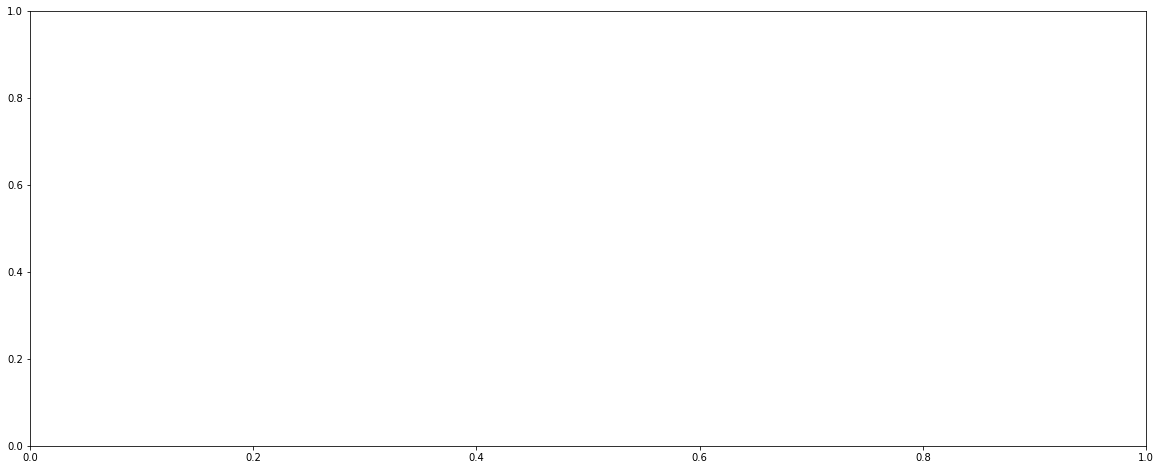

In [48]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(old_erdp_pts[0.0], color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

In [4]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
# ax1.plot(old_erdp_pts[0.0], color = 'r')
ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

NameError: name 'rcParams' is not defined

In [ ]:
erdp_pts.shape[0]

In [ ]:
tau_erodep  =  np.sum(np.square(old_erdp_pts[0.0] - erdp_pts))/ erdp_pts.shape[0]

In [ ]:
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(old_erdp_pts[0.0] - erdp_pts) / tau_erodep )

In [ ]:
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

In [ ]:
array = old_erdp_pts[0.0]
# array[array < 0] = 0
array[array < 0] = np.mean(erdp_pts)
# array[array < 0] = np.mode(erdp_pts)


In [ ]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(array, color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(array,bins = 30,kde = False)


In [ ]:
tau_erodep  =  np.sum(np.square(array - erdp_pts))/ erdp_pts.shape[0]
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(array - erdp_pts) / tau_erodep )
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

In [ ]:

array = new_erdp_pts[0.0]
# array[array < 0] = 0
array[array < 0] = np.mean(erdp_pts)

rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(array, color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(array, bins = 30, kde = False)

In [ ]:
tau_erodep  =  np.sum(np.square(array - erdp_pts))/ erdp_pts.shape[0]
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(array - erdp_pts) / tau_erodep )
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

In [ ]:
print(np.mean(erdp_pts))